<a href="https://colab.research.google.com/github/shilphypg/DSA_ICTAK/blob/main/Internship_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Salary Prediction and Job Analysis using Machine Learning**

---



#**Week1: Data Understanding, Cleaning, and EDA**

# Goals and Weekly Plan

Goal: Familiarize with the dataset, clean and preprocess the data, and perform exploratory data analysis (EDA) to understand patterns and relationships.


1.   Data Loading and Inspection:


*   Load the dataset, examine columns, data types, and identify any missing or inconsistent values.
*   Convert data types where necessary (e.g., dates, categorical encoding).


2.   Data Cleaning:


*   Handle missing values through imputation or removal.
*   Standardize categorical values.
*   Ensure all salary values are in USD for consistency in analysis.


3.   Exploratory Data Analysis (EDA):


*   Generate descriptive statistics.
Plot distribution of salaries by job_category, experience_level, work_setting, and company_size.


4.   Documentation:



*   Summarize insights and challenges from the data cleaning and EDA phases.


**Import the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# 1.   Data Loading and Inspection:





In [2]:
df = pd.read_excel("/content/dsa_job.xlsx")
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


No of rows and columns in the dataframe

In [3]:
df.shape

(5000, 12)

List of columns

In [4]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

Column datatypes

In [5]:
df.dtypes

,0
work_year,int64
job_title,object
job_category,object
salary_currency,object
salary,int64
salary_in_usd,int64
employee_residence,object
experience_level,object
employment_type,object
work_setting,object


In [6]:
df.duplicated().sum()

0

Information of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [8]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [9]:
df['employee_residence'].unique()

array(['US', 'JP', 'UK', 'DE', 'CN', 'MX', 'IN'], dtype=object)

In [10]:
df['company_location'].unique()

array(['DE', 'IN', 'CN', 'MX', 'UK', 'JP', 'US'], dtype=object)

In [11]:
df['job_title'].value_counts()

,count
job_title,
Data Engineer in office,372
Data Engineer,355
Statistician,354
Data Scientist,353
Data Analyst in office,339
Data Engineer (Remote),338
Data Analyst (Remote),336
Machine Learning Engineer in office,331
Data Scientist in office,330


In [12]:
df['job_category'].value_counts()

,count
job_category,
Data Science,1173
ML/AI,1151
Analysis,1108
Engineering,1068


Check for missing values

In [13]:
df.isnull().sum()

,0
work_year,0
job_title,0
job_category,500
salary_currency,500
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


# 2.   Data Cleaning and Data Conversion



In [14]:
import re

# Define patterns to map job titles to categories
job_patterns = {
    r'Data Analyst': 'Analysis',
    r'Data Engineer': 'Engineering',
    r'Data Scientist': 'Data Science',
    r'Machine Learning Engineer': 'ML/AI',
    r'Statistician': 'Quantitative Analyst'
}

# Function to determine job category based on regex patterns
def get_job_category(job_title):
    for pattern, category in job_patterns.items():
        if re.search(pattern, job_title, re.IGNORECASE):
            return category
    return None  # Return None if no pattern is matched

# Apply the function to create or update 'job_category' based on 'job_title'
df['job_category'] = df['job_title'].apply(lambda title: get_job_category(title) or df['job_category'])

# Display the updated DataFrame to verify
df[['job_title', 'job_category']].head()

,job_title,job_category
0,Machine Learning Engineer in office,ML/AI
1,Statistician (Remote),Quantitative Analyst
2,Machine Learning Engineer,ML/AI
3,Data Analyst in office,Analysis
4,Statistician,Quantitative Analyst


In [15]:
df[['job_title', 'job_category']].head(20)

,job_title,job_category
0,Machine Learning Engineer in office,ML/AI
1,Statistician (Remote),Quantitative Analyst
2,Machine Learning Engineer,ML/AI
3,Data Analyst in office,Analysis
4,Statistician,Quantitative Analyst
5,Machine Learning Engineer,ML/AI
6,Data Analyst in office,Analysis
7,Data Scientist (Remote),Data Science
8,Data Analyst,Analysis
9,Statistician (Remote),Quantitative Analyst


In [16]:
import re

# Define patterns to map job titles to work settings
job_patterns_to_work_setting = {
    r'^Data Analyst$': 'Hybrid',
    r'^Data Analyst\s+\(Remote\)$': 'Remote',
    r'^Data Analyst\s+in office$': 'In-person',
    r'^Data Engineer$': 'Hybrid',
    r'^Data Engineer\s+\(Remote\)$': 'Remote',
    r'^Data Engineer\s+in office$': 'In-person',
    r'^Data Scientist$': 'Hybrid',
    r'^Data Scientist\s+\(Remote\)$': 'Remote',
    r'^Data Scientist\s+in office$': 'In-person',
    r'^Machine Learning Engineer$': 'Hybrid',
    r'^Machine Learning Engineer\s+\(Remote\)$': 'Remote',
    r'^Machine Learning Engineer\s+in office$': 'In-person',
    r'^Statistician$': 'Hybrid',
    r'^Statistician\s+\(Remote\)$': 'Remote',
    r'^Statistician\s+in office$': 'In-person'
}

# Function to determine work setting based on regex patterns
def get_work_setting(job_title):
    for pattern, work_setting in job_patterns_to_work_setting.items():
        if re.search(pattern, job_title, re.IGNORECASE):
            return work_setting
    return None  # Return None if no pattern is matched

# Apply the function to create or update 'work_setting' based on 'job_title'
df['work_setting'] = df['job_title'].apply(lambda title: get_work_setting(title) or df['work_setting'])

# Display the updated DataFrame with corrected 'work_setting' values to verify
df[['job_title', 'work_setting']].head(20)

,job_title,work_setting
0,Machine Learning Engineer in office,In-person
1,Statistician (Remote),Remote
2,Machine Learning Engineer,Hybrid
3,Data Analyst in office,In-person
4,Statistician,Hybrid
5,Machine Learning Engineer,Hybrid
6,Data Analyst in office,In-person
7,Data Scientist (Remote),Remote
8,Data Analyst,Hybrid
9,Statistician (Remote),Remote


In [17]:
df['company_location'].value_counts()

,count
company_location,
UK,789
DE,726
MX,713
IN,708
CN,697
US,684
JP,683


In [18]:
df['salary_currency'].value_counts()

,count
salary_currency,
EUR,962
INR,916
JPY,891
us dolars,875
GBP,856


In [19]:
import re

# Define a dictionary mapping country codes/abbreviations to currency codes
country_to_currency = {
    r'UK': 'GBP',
    r'DE': 'EUR',
    r'MX': 'MXN',
    r'IN': 'INR',
    r'CN': 'CNY',
    r'US': 'USD'
}

# Function to categorize salary currency based on company location
def categorize_salary_currency(company_location):
    for country_pattern, currency in country_to_currency.items():
        if re.search(country_pattern, company_location, re.IGNORECASE):
            return currency
    return 'JPY'  # Default currency if no match is found

# Apply the function to create or update 'salary_currency' based on 'company_location'
df['salary_currency'] = df['company_location'].apply(categorize_salary_currency)

# Display the updated DataFrame to verify
df[['company_location', 'salary_currency']].head(20)

,company_location,salary_currency
0,DE,EUR
1,IN,INR
2,CN,CNY
3,MX,MXN
4,UK,GBP
5,DE,EUR
6,DE,EUR
7,JP,JPY
8,DE,EUR
9,US,USD


In [20]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [21]:
df['experience_level'].value_counts()

,count
experience_level,
SE,1154
EX,1119
EN,1115
MI,1112


In [22]:
df['company_size'].value_counts()

,count
company_size,
S,1519
M,1517
L,1464


In [23]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,EUR,186597,136086,US,MI,CT,In-person,DE,L
1,2020,Statistician (Remote),Quantitative Analyst,INR,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,CNY,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analysis,MXN,154130,135242,DE,SE,FT,In-person,MX,L
4,2020,Statistician,Quantitative Analyst,GBP,172312,35156,UK,MI,FT,Hybrid,UK,S


In [24]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [25]:
df.describe().astype(int)

,work_year,salary,salary_in_usd
count,5000,5000,5000
mean,2020,102046,114076
std,0,70853,49113
min,2020,-198754,30016
25%,2020,64295,71343
50%,2021,110636,114167
75%,2022,153104,156665
max,2022,199924,199985


Missing values

In [26]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [27]:
df.shape

(5000, 12)

In [28]:
df.dtypes

,0
work_year,int64
job_title,object
job_category,object
salary_currency,object
salary,int64
salary_in_usd,int64
employee_residence,object
experience_level,object
employment_type,object
work_setting,object


In [29]:
# Replace '-' with an empty string in 'salary_in_usd' and convert to numeric
df['salary'] = df['salary'].astype(str).str.replace('-', '', regex=False)
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')

In [30]:
df.head(20)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,EUR,186597,136086,US,MI,CT,In-person,DE,L
1,2020,Statistician (Remote),Quantitative Analyst,INR,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,CNY,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analysis,MXN,154130,135242,DE,SE,FT,In-person,MX,L
4,2020,Statistician,Quantitative Analyst,GBP,172312,35156,UK,MI,FT,Hybrid,UK,S
5,2020,Machine Learning Engineer,ML/AI,EUR,36544,68280,CN,MI,FT,Hybrid,DE,M
6,2022,Data Analyst in office,Analysis,EUR,178404,105324,DE,EX,PT,In-person,DE,L
7,2021,Data Scientist (Remote),Data Science,JPY,187908,90706,UK,EX,CT,Remote,JP,M
8,2022,Data Analyst,Analysis,EUR,44388,171043,UK,NaN,FL,Hybrid,DE,NaN
9,2022,Statistician (Remote),Quantitative Analyst,USD,31694,73408,DE,EN,CT,Remote,US,S


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        5000 non-null   object
 3   salary_currency     5000 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [32]:
df.dtypes

,0
work_year,int64
job_title,object
job_category,object
salary_currency,object
salary,int64
salary_in_usd,int64
employee_residence,object
experience_level,object
employment_type,object
work_setting,object


# Univariate Analysis

Categorical Columns


Value counts for job_title:
 job_title
Data Engineer  in office                372
Data Engineer                           355
Statistician                            354
Data Scientist                          353
Data Analyst  in office                 339
Data Engineer  (Remote)                 338
Data Analyst  (Remote)                  336
Machine Learning Engineer  in office    331
Data Scientist  in office               330
Machine Learning Engineer  (Remote)     327
Statistician  (Remote)                  323
Statistician  in office                 317
Data Scientist  (Remote)                310
Data Analyst                            309
Machine Learning Engineer               306
Name: count, dtype: int64


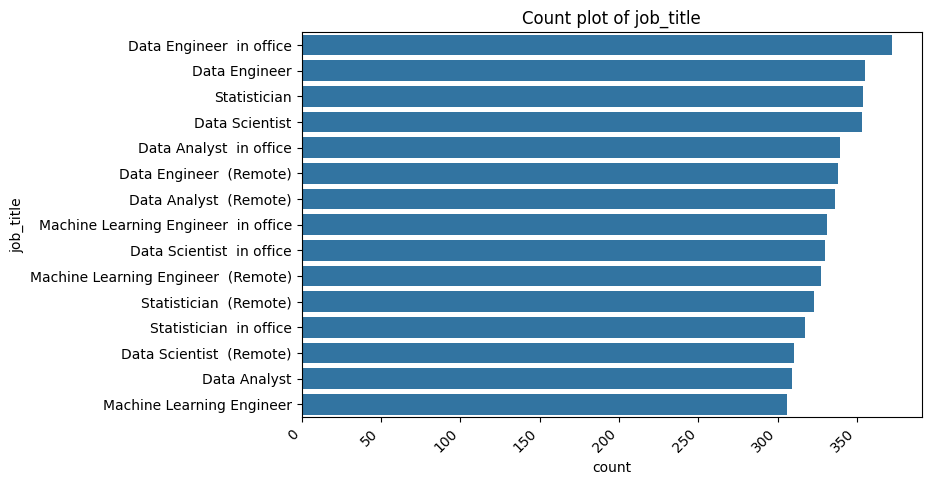


Value counts for job_category:
 job_category
Engineering             1065
Quantitative Analyst     994
Data Science             993
Analysis                 984
ML/AI                    964
Name: count, dtype: int64


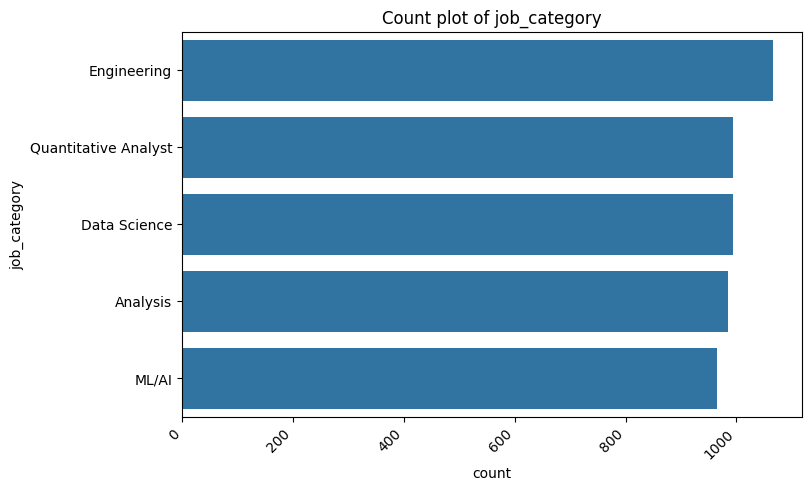


Value counts for salary_currency:
 salary_currency
GBP    789
EUR    726
MXN    713
INR    708
CNY    697
USD    684
JPY    683
Name: count, dtype: int64


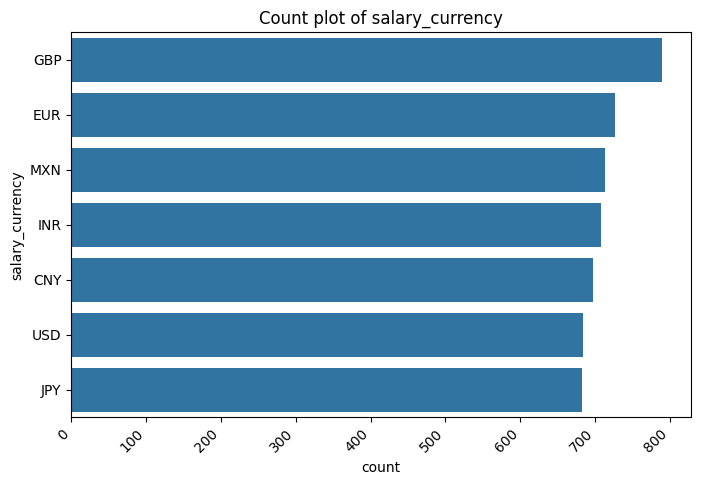


Value counts for employee_residence:
 employee_residence
JP    783
IN    741
US    721
DE    706
MX    705
CN    674
UK    670
Name: count, dtype: int64


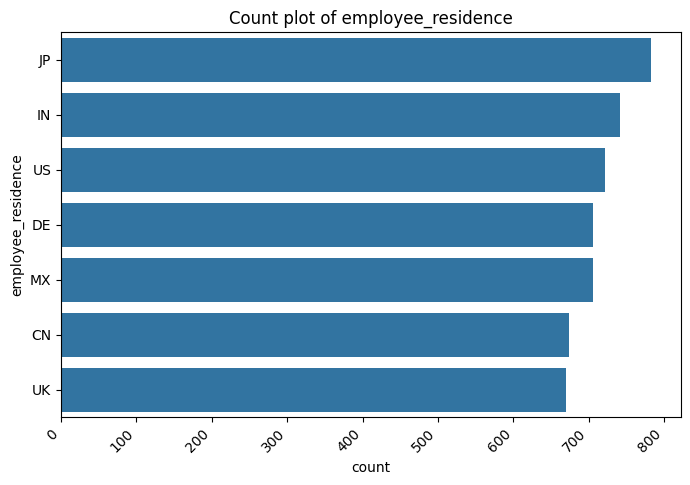


Value counts for experience_level:
 experience_level
SE    1154
EX    1119
EN    1115
MI    1112
Name: count, dtype: int64


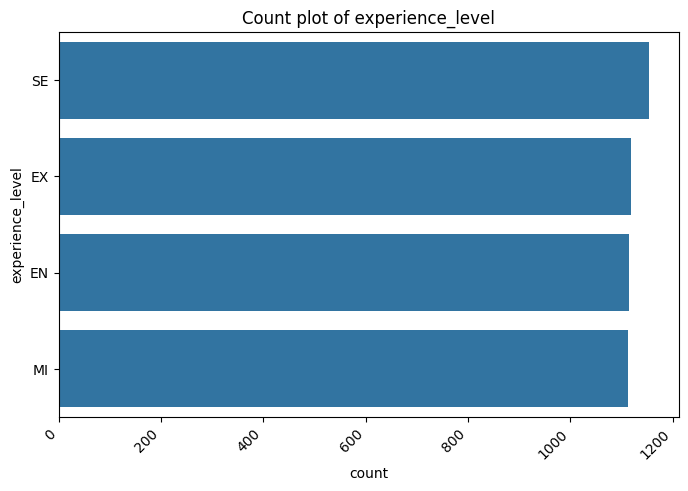


Value counts for employment_type:
 employment_type
PT    1268
FL    1263
FT    1245
CT    1224
Name: count, dtype: int64


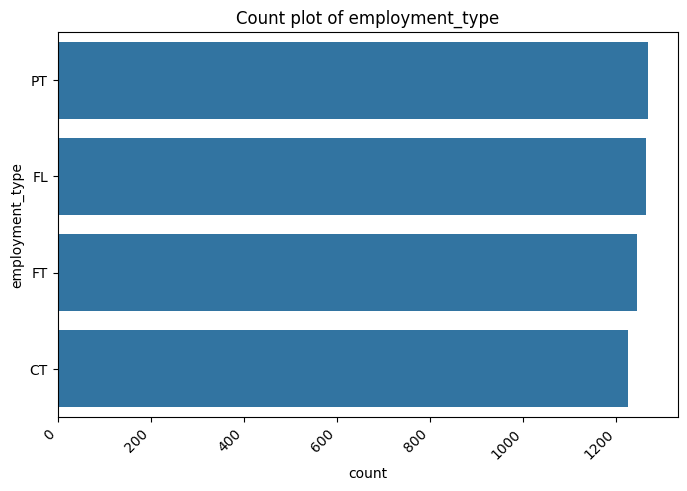


Value counts for work_setting:
 work_setting
In-person    1689
Hybrid       1677
Remote       1634
Name: count, dtype: int64


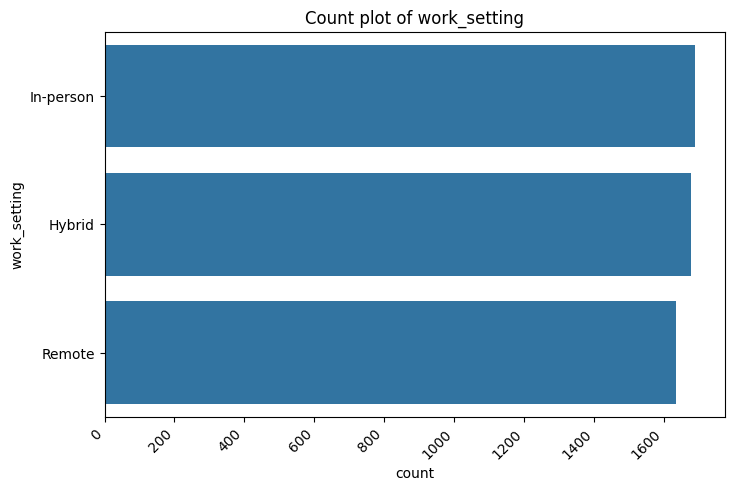


Value counts for company_location:
 company_location
UK    789
DE    726
MX    713
IN    708
CN    697
US    684
JP    683
Name: count, dtype: int64


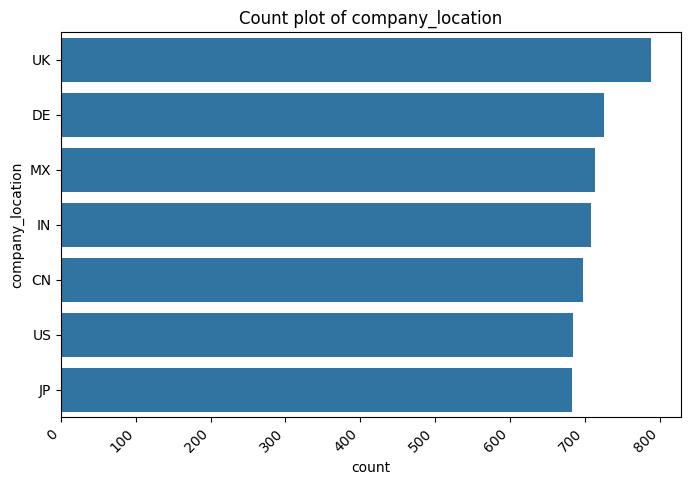


Value counts for company_size:
 company_size
S    1519
M    1517
L    1464
Name: count, dtype: int64


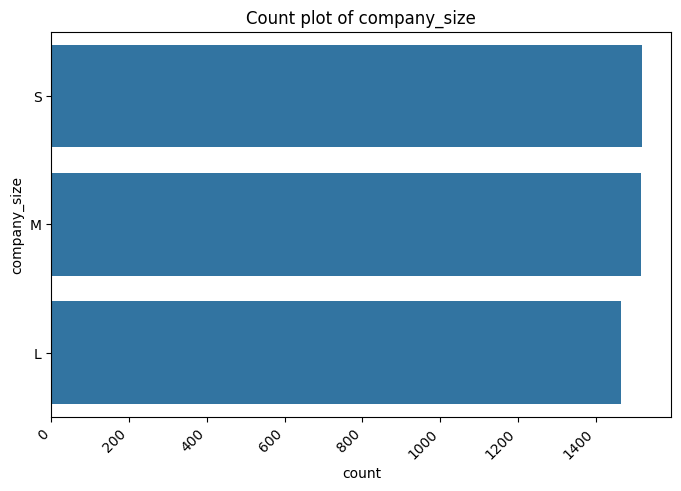

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Print unique values and counts for each categorical column
for col in categorical_cols:
    print(f'\nValue counts for {col}:\n', df[col].value_counts())

    # Plot bar charts for each categorical column
    plt.figure(figsize=(8, 5))  # Ensure plt.figure() is called correctly
    sns.countplot(df[col], order=df[col].value_counts().index)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45,ha='right')
    plt.show()

Numerical Columns

        work_year         salary  salary_in_usd
count  5000.00000    5000.000000    5000.000000
mean   2020.97680  114201.052800  114076.995800
std       0.81951   48900.704986   49113.807687
min    2020.00000   30018.000000   30016.000000
25%    2020.00000   71946.500000   71343.750000
50%    2021.00000  115008.500000  114167.000000
75%    2022.00000  155858.750000  156665.750000
max    2022.00000  199924.000000  199985.000000


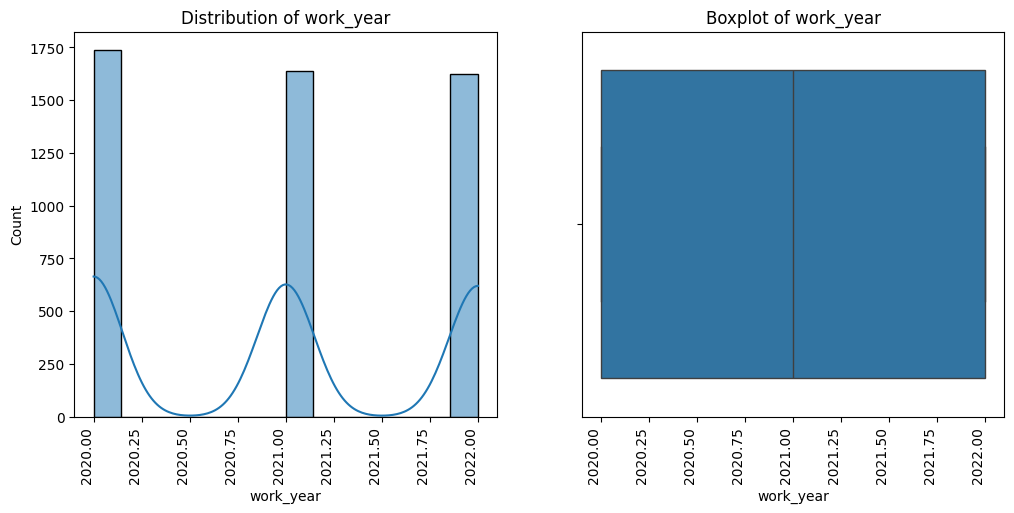

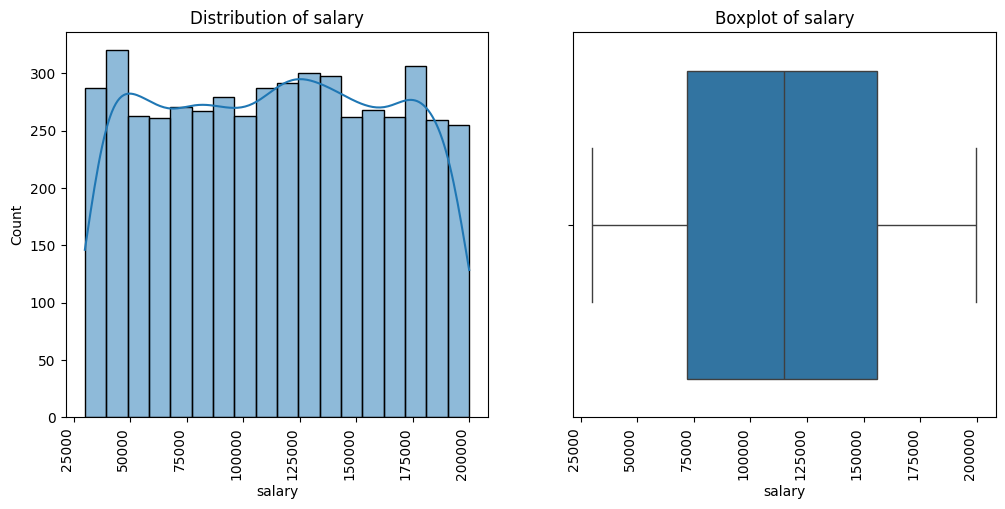

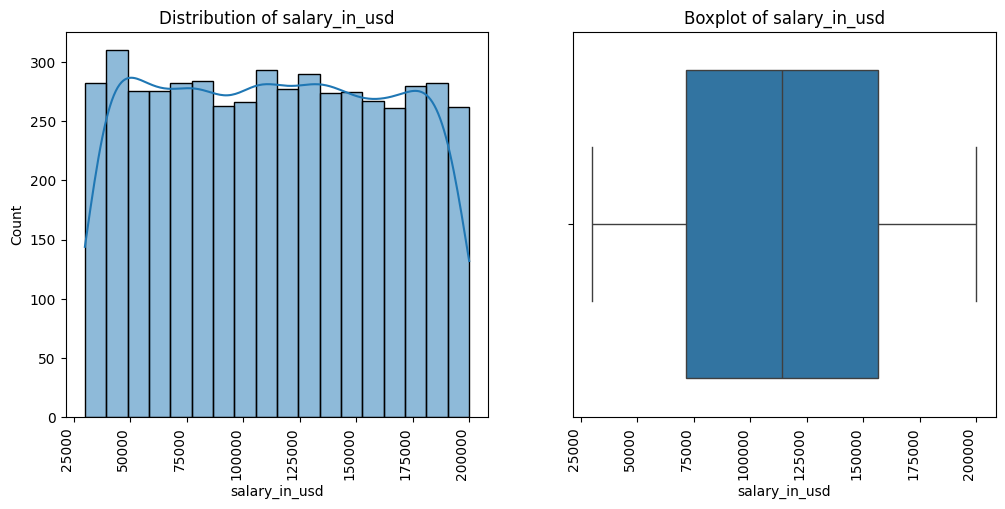

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Describe numerical columns to get summary statistics
print(df.describe())

# Plot histograms and boxplots for each numerical column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90,ha='right')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=90,ha='right')
    plt.show()

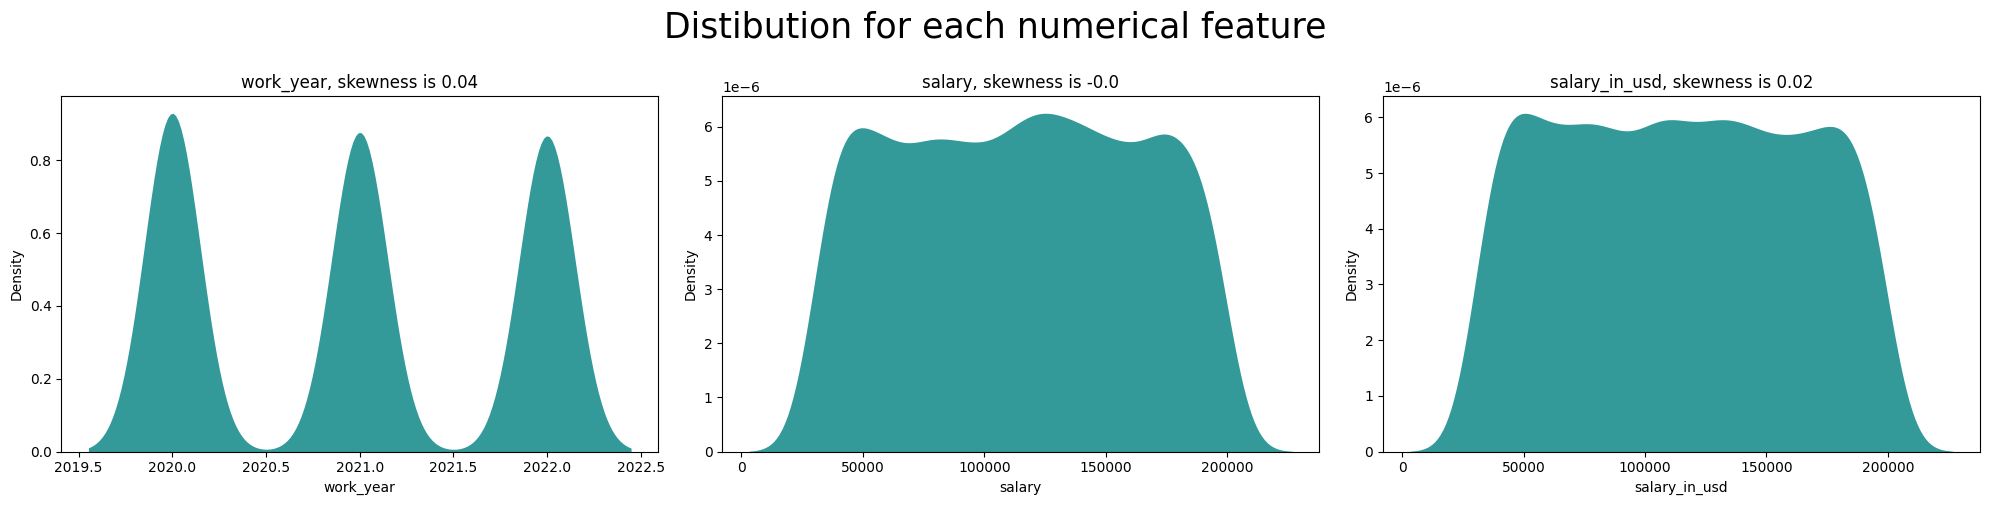

In [35]:
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(20,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

dist_custom(dataset=df, columns_list=numerical_cols, rows=1, cols=3, suptitle='Distibution for each numerical feature')
plt.tight_layout()

# Bivariate Analysis

Categorical Columns

1. Frequency Table

In [36]:
# Example: Frequency table of 'job_category' and 'experience_level'
cross_tab = pd.crosstab(df['job_category'], df['experience_level'])
print(cross_tab)

experience_level       EN   EX   MI   SE
job_category                            
Analysis              231  213  227  227
Data Science          238  223  219  212
Engineering           225  250  243  247
ML/AI                 202  214  203  230
Quantitative Analyst  219  219  220  238


2. Heatmap of Frequency Table

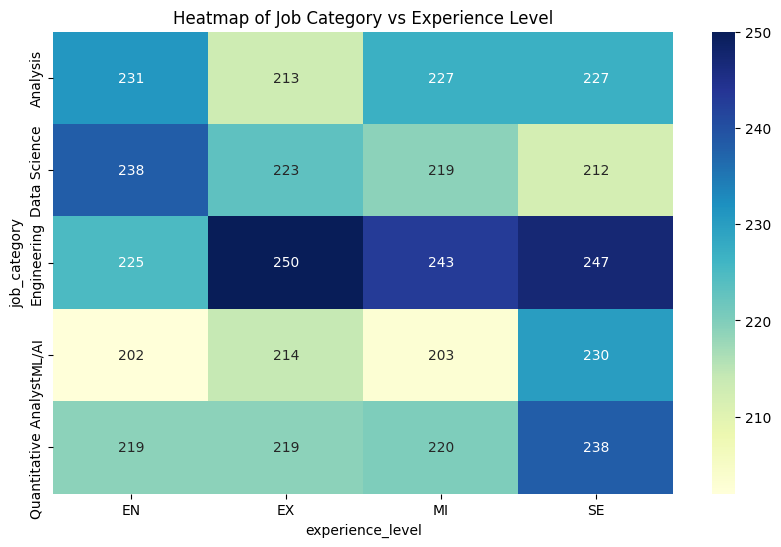

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a cross-tabulation of two categorical columns
cross_tab = pd.crosstab(df['job_category'], df['experience_level'])

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Job Category vs Experience Level")
plt.show()

3. Stacked Bar Chart

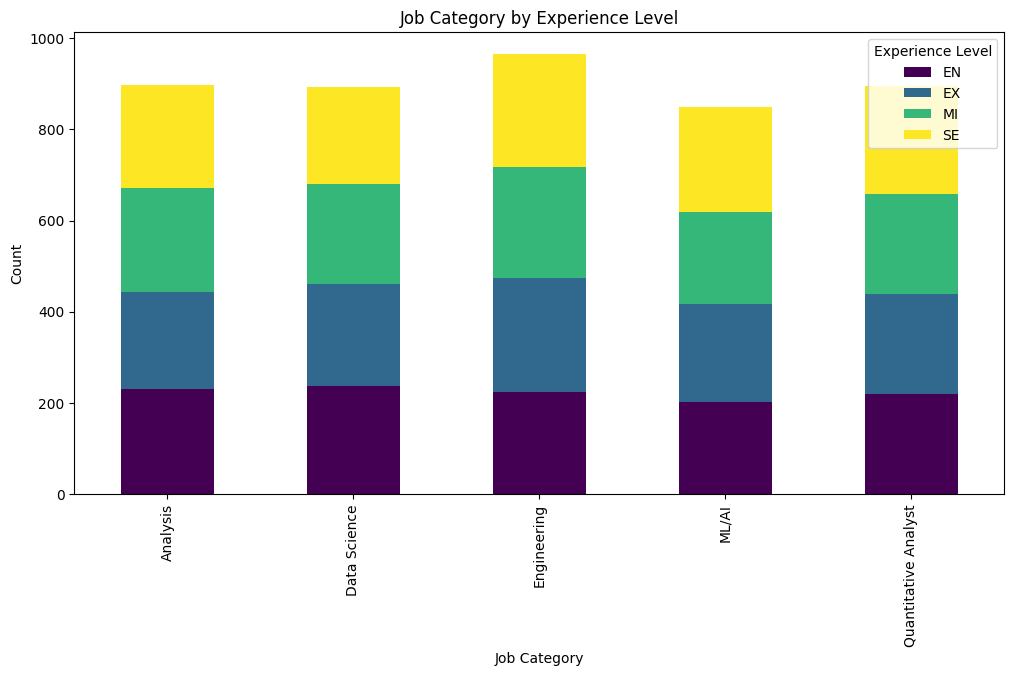

In [38]:
# Create a grouped DataFrame for 'job_category' and 'experience_level'
job_exp_group = df.groupby(['job_category', 'experience_level']).size().unstack()

# Plot a stacked bar chart
job_exp_group.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Job Category by Experience Level")
plt.xlabel("Job Category")
plt.ylabel("Count")
plt.legend(title="Experience Level")
plt.show()


4. Count Plot with Hue

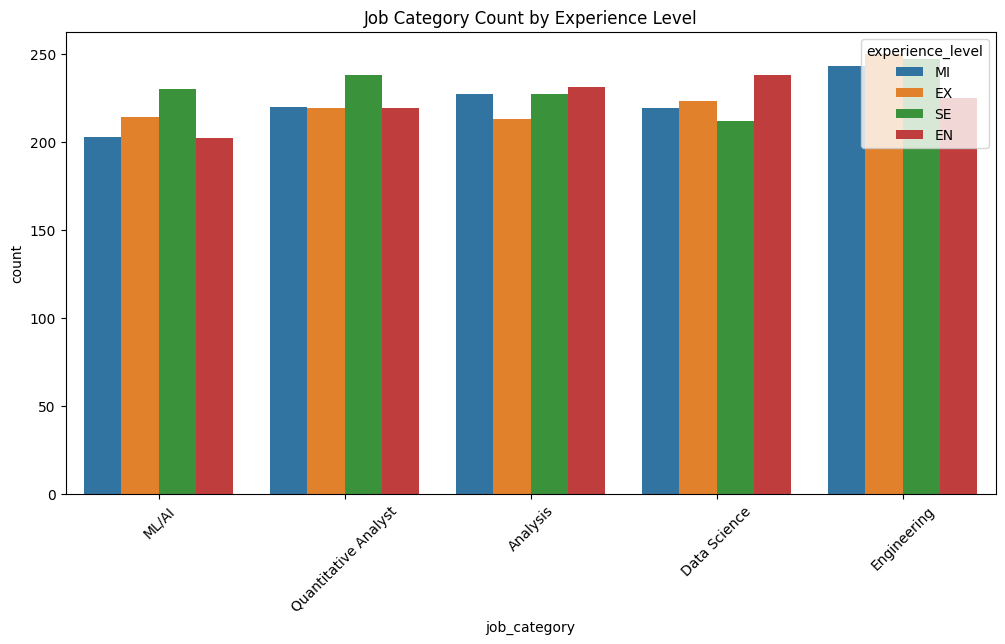

In [39]:
# Example: Count plot for 'job_category' with 'experience_level' as hue
plt.figure(figsize=(12, 6))
sns.countplot(x='job_category', hue='experience_level', data=df)
plt.title("Job Category Count by Experience Level")
plt.xticks(rotation=45)
plt.show()

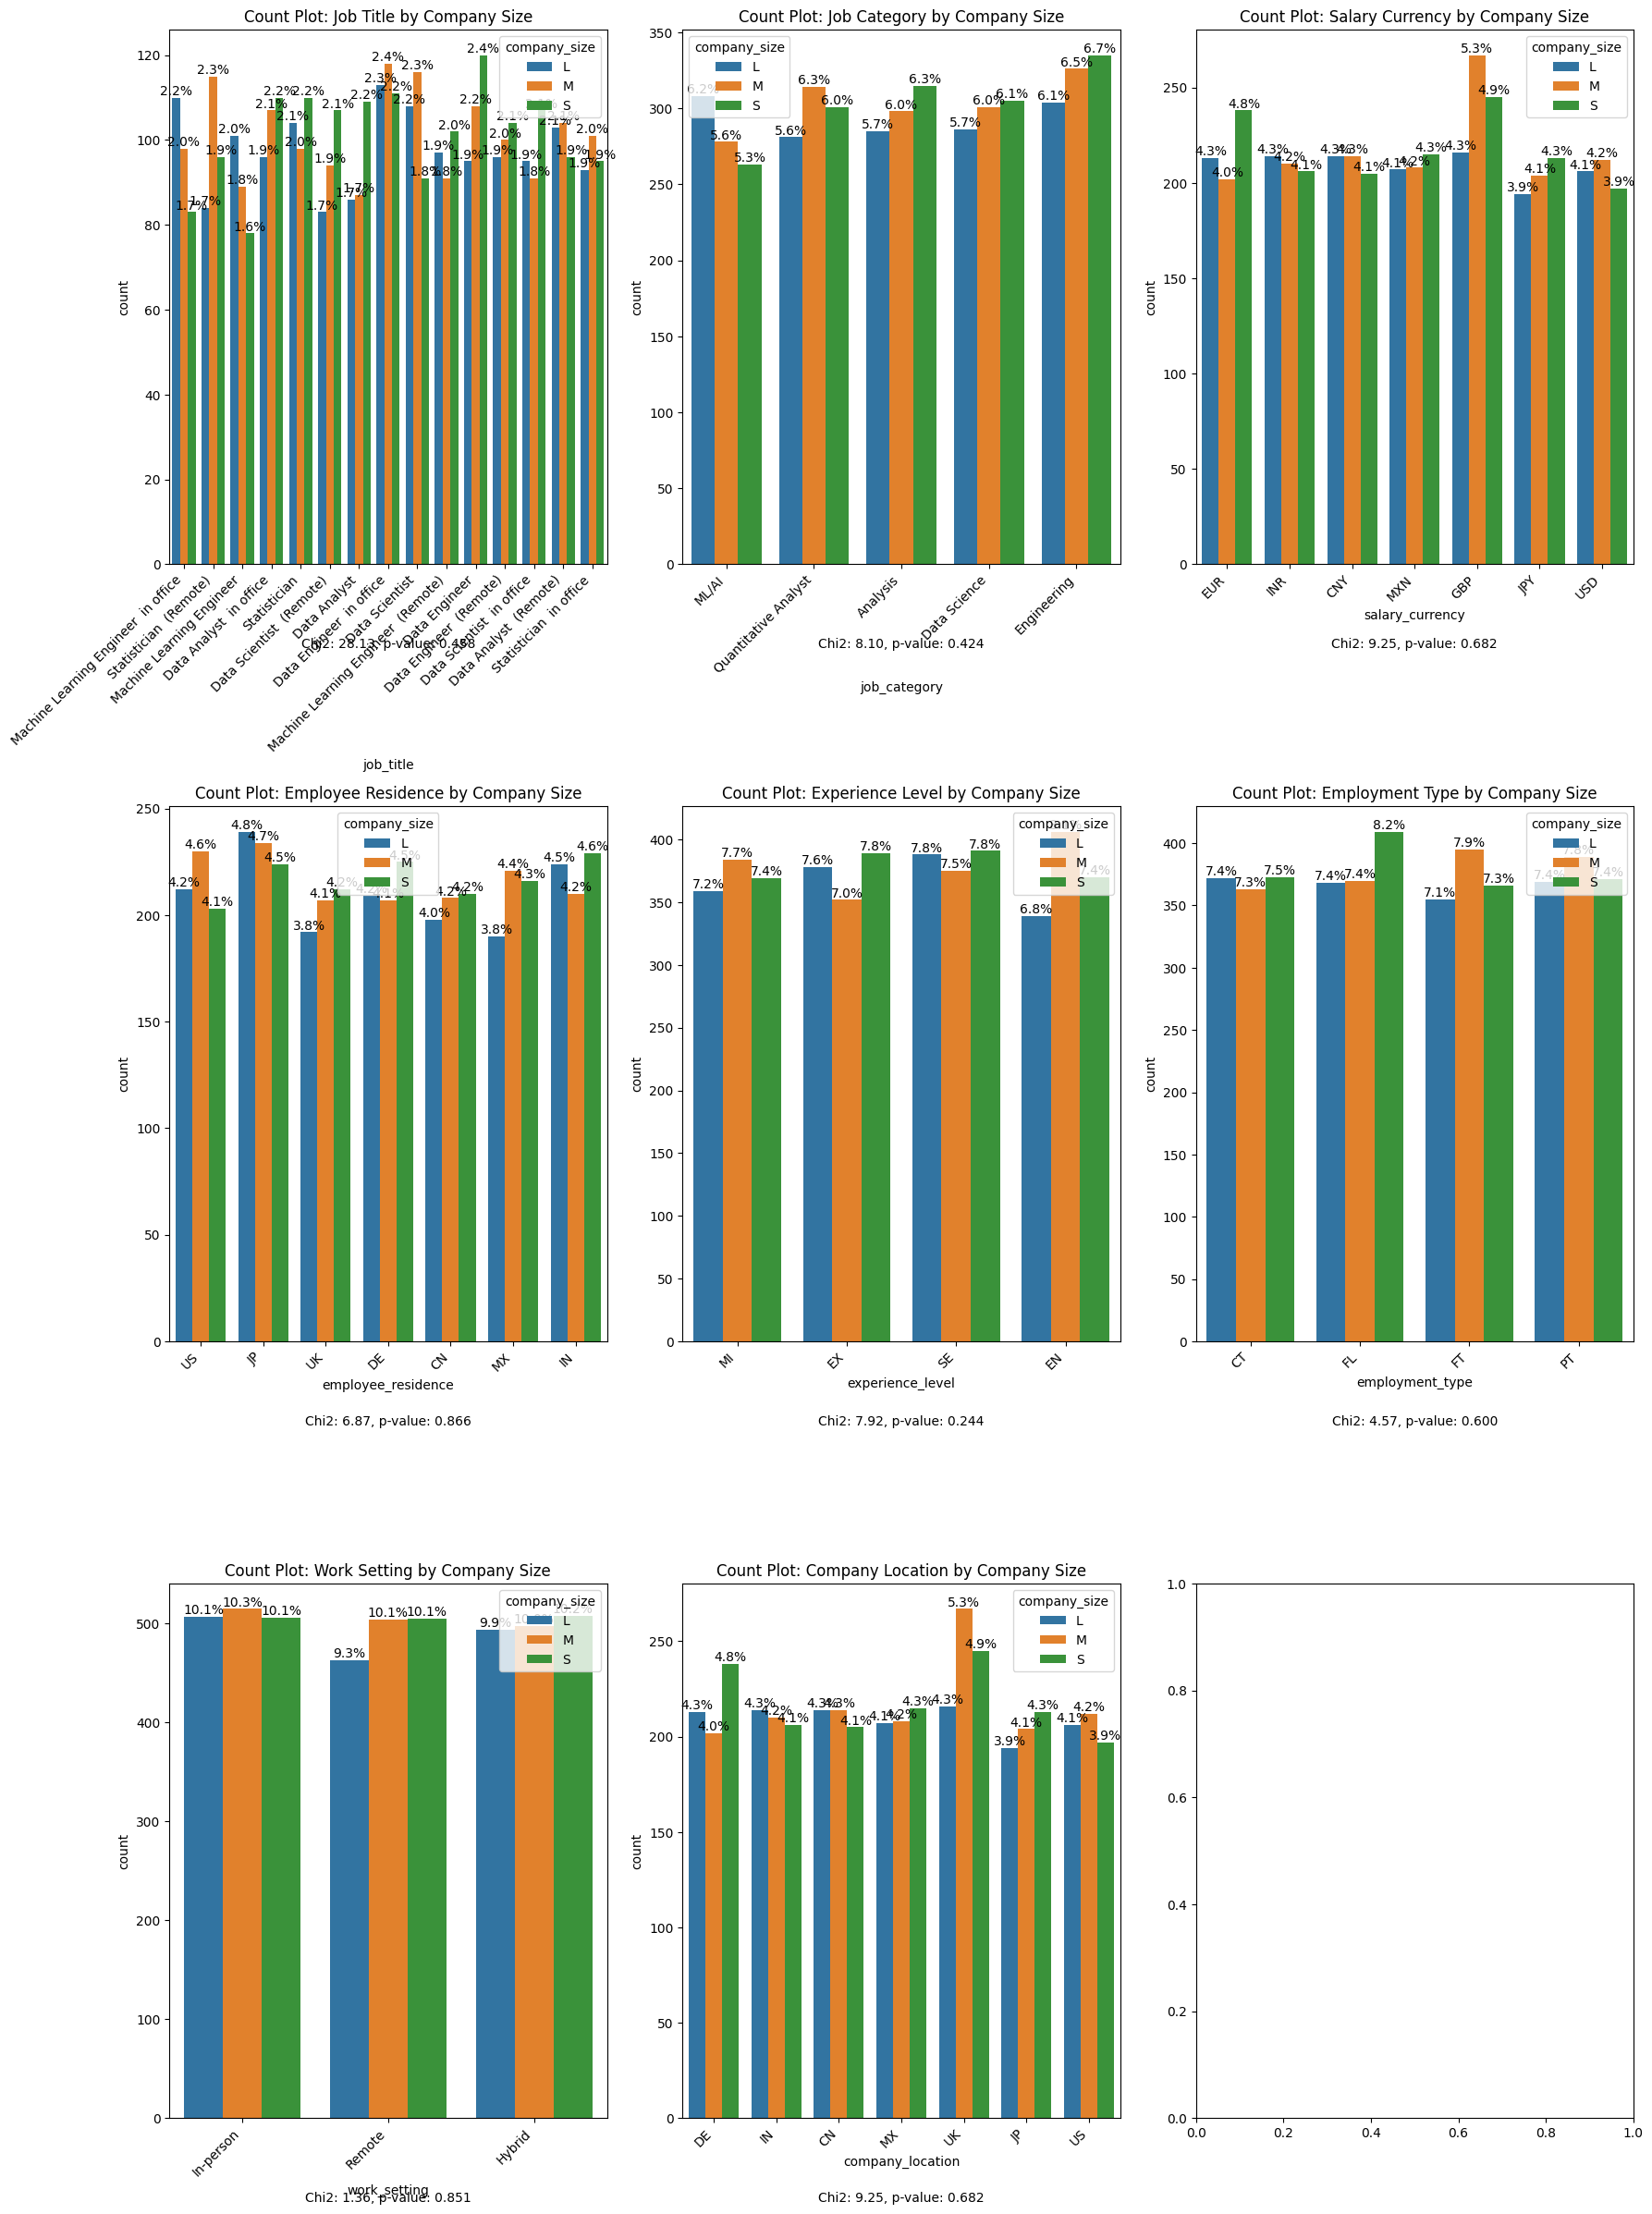

In [40]:
from scipy.stats import chi2_contingency
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate Chi-Square and p-value
def chi_square_test(dataframe, feature, target):
    contingency_table = pd.crosstab(dataframe[feature], dataframe[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

# List of features to plot, adjusted to your dataset
features = [
    ('job_title', 'Count Plot: Job Title by Company Size'),
    ('job_category', 'Count Plot: Job Category by Company Size'),
    ('salary_currency', 'Count Plot: Salary Currency by Company Size'),
    ('employee_residence', 'Count Plot: Employee Residence by Company Size'),
    ('experience_level', 'Count Plot: Experience Level by Company Size'),
    ('employment_type', 'Count Plot: Employment Type by Company Size'),
    ('work_setting', 'Count Plot: Work Setting by Company Size'),
    ('company_location', 'Count Plot: Company Location by Company Size')
]

# Create subplots with enough space
fig, axes = plt.subplots(3, 3, figsize=(18, 24)) # Adjusted grid size for 8 features

# Loop through the features for count plots
for i, (feature, title) in enumerate(features):
    ax = axes[i // 3, i % 3] # Determine the correct subplot
    sns.countplot(data=df, x=feature, hue='company_size', ax=ax)
    ax.set_title(title)

    # Calculate total counts for percentages
    total = len(df)

    # Add percentage annotations on top of the bars
    for p in ax.patches:
        height = p.get_height()
        if height == 0: # Skip if the bar height is 0 (0.0%)
            continue
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')

    # Perform Chi-Square test and get results
    chi2, p = chi_square_test(df, feature, 'company_size')
    ax.text(0.5, -0.15, f'Chi2: {chi2:.2f}, p-value: {p:.3f}', ha='center', va='center', transform=ax.transAxes)

    # Use plt.xticks() for proper x-tick label rotation if needed
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

Numerical columns

1. Box Plot

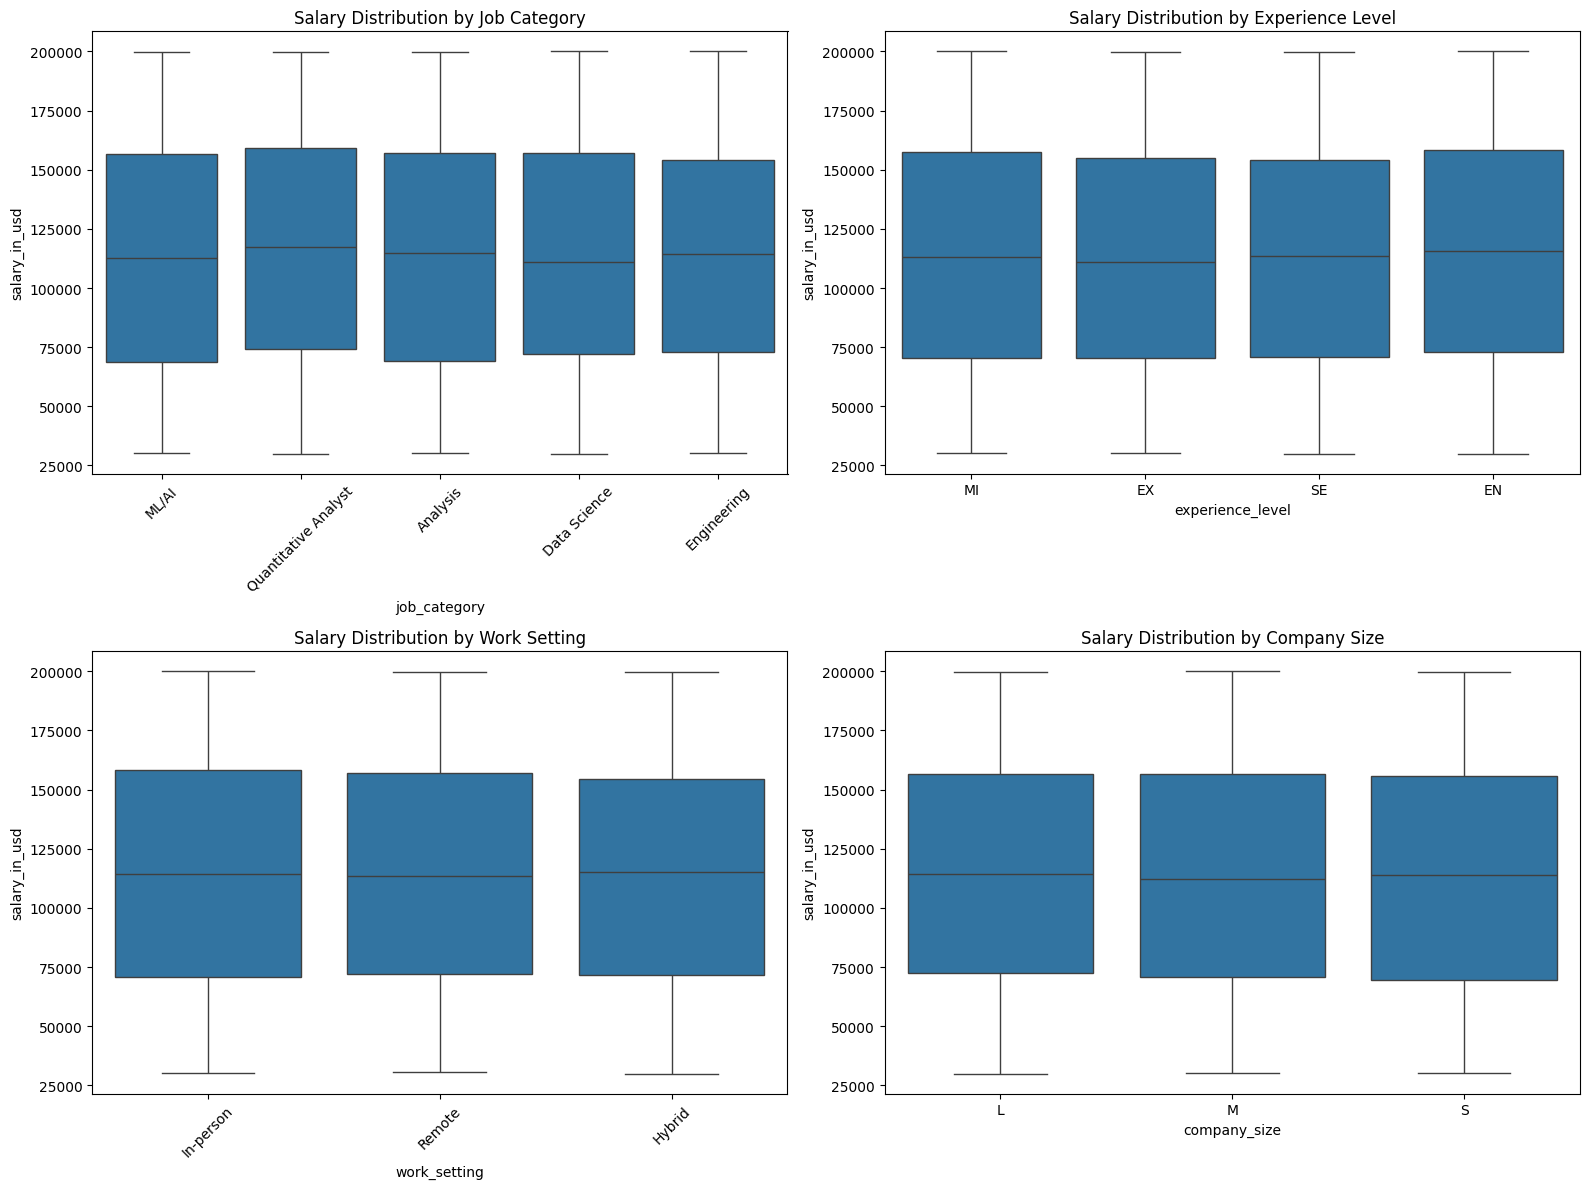

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot salary distribution by job_category, experience_level, work_setting, and company_size
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x='job_category', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')

plt.subplot(2, 2, 3)
sns.boxplot(x='work_setting', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Work Setting')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Company Size')

plt.tight_layout()
plt.show()

2. Correlation Coefficient

               work_year    salary  salary_in_usd
work_year       1.000000 -0.000079      -0.015542
salary         -0.000079  1.000000       0.012067
salary_in_usd  -0.015542  0.012067       1.000000


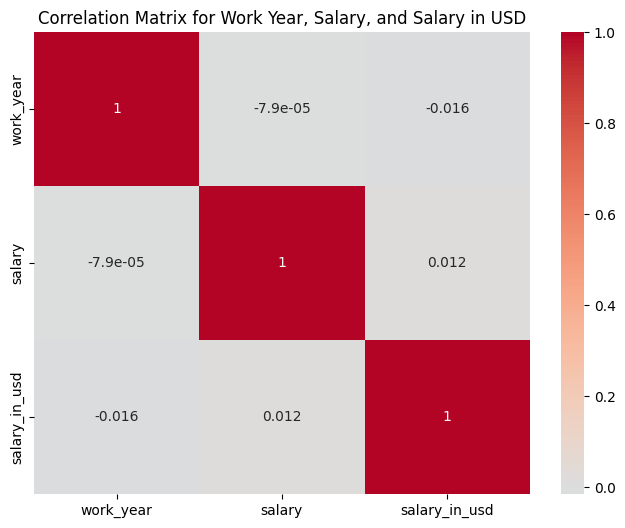

In [42]:
# Correlation matrix for numerical columns
correlation_matrix = df[['work_year', 'salary', 'salary_in_usd']].corr()
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Work Year, Salary, and Salary in USD')
plt.show()

3. Pair Plot

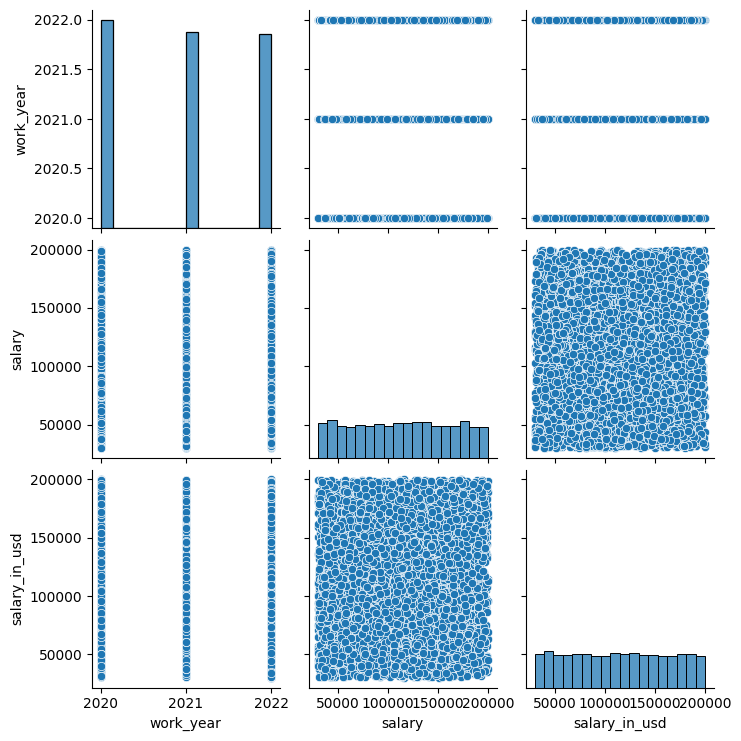

In [43]:
# Pair plot for the numerical columns
sns.pairplot(df[['work_year', 'salary', 'salary_in_usd']])
plt.show()

5. Joint Plot

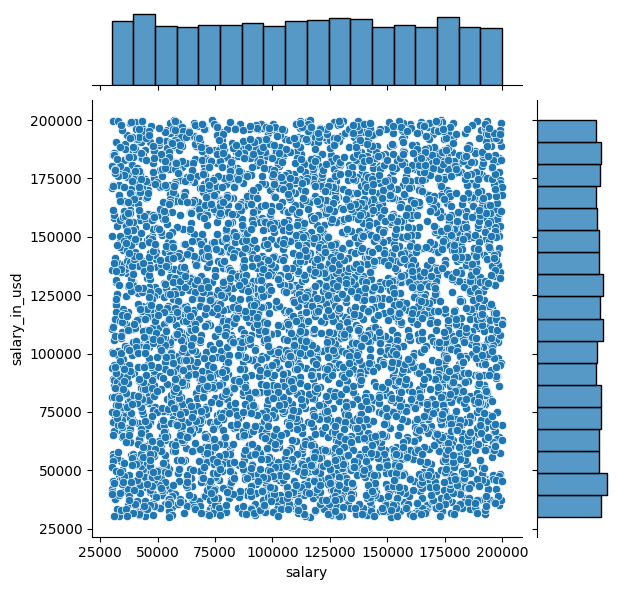

In [44]:
# Joint plot for 'salary' and 'salary_in_usd'
sns.jointplot(x='salary', y='salary_in_usd', data=df, kind='scatter')
plt.show()

Checking for inconsistenty in dataset

In [45]:
# Identify Duplicate Rows
duplicates = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicates)}")

# Check Data Types
print("\nData Types:\n", df.dtypes)

# Range Checks for Numerical Columns
# Example: Check salary range (replace 'salary_in_usd' with the relevant column name)
print("\nSalary Range:")
print("Min salary:", df['salary_in_usd'].min())
print("Max salary:", df['salary_in_usd'].max())

# Check for Inconsistent Categorical Values
# Identify unique values for each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':", df[col].unique())


Number of duplicate rows: 0

Data Types:
 work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

Salary Range:
Min salary: 30016
Max salary: 199985

Unique values in 'job_title': ['Machine Learning Engineer  in office' 'Statistician  (Remote)'
 'Machine Learning Engineer' 'Data Analyst  in office' 'Statistician'
 'Data Scientist  (Remote)' 'Data Analyst' 'Data Engineer  in office'
 'Data Scientist' 'Machine Learning Engineer  (Remote)' 'Data Engineer'
 'Data Engineer  (Remote)' 'Data Scientist  in office'
 'Data Analyst  (Remote)' 'Statistician  in office']

Unique values in 'job_category': ['ML/AI' 'Quantitative Analyst' 'Analysis' 'Data Science' 'Engineering']

Unique values in 's

# Dealing with Outliers

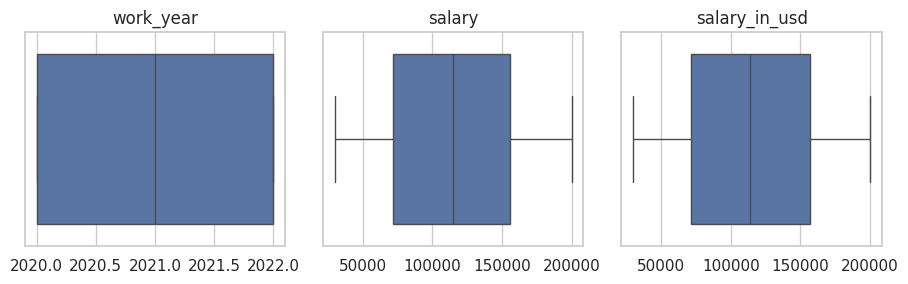

In [46]:
sns.set(style="whitegrid")

numerical_columns = [col for col in df.columns if df[col].dtype !='object']

num_columns = 5
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 3, num_rows * 3))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

Convert data types

In [47]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,EUR,186597,136086,US,MI,CT,In-person,DE,L
1,2020,Statistician (Remote),Quantitative Analyst,INR,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,CNY,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analysis,MXN,154130,135242,DE,SE,FT,In-person,MX,L
4,2020,Statistician,Quantitative Analyst,GBP,172312,35156,UK,MI,FT,Hybrid,UK,S


In [48]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [49]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,114201.052800,114076.995800
std,0.81951,48900.704986,49113.807687
min,2020.00000,30018.000000,30016.000000
25%,2020.00000,71946.500000,71343.750000
50%,2021.00000,115008.500000,114167.000000
75%,2022.00000,155858.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [50]:
# Fill missing values in 'company_size' with the mode of the column
company_size_mode = df['company_size'].mode()[0]
df['company_size'] = df['company_size'].fillna(company_size_mode)

# Fill missing values in 'experience_level' with the mode of the column
experience_level_mode = df['experience_level'].mode()[0]
df['experience_level'] = df['experience_level'].fillna(experience_level_mode)

# Display the updated DataFrame to check
print(df[['company_size', 'experience_level']].isna().sum())  # To verify no NaN values remain

company_size        0
experience_level    0
dtype: int64


In [51]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,0
employment_type,0
work_setting,0


In [52]:
df.head(20)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,EUR,186597,136086,US,MI,CT,In-person,DE,L
1,2020,Statistician (Remote),Quantitative Analyst,INR,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,CNY,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analysis,MXN,154130,135242,DE,SE,FT,In-person,MX,L
4,2020,Statistician,Quantitative Analyst,GBP,172312,35156,UK,MI,FT,Hybrid,UK,S
5,2020,Machine Learning Engineer,ML/AI,EUR,36544,68280,CN,MI,FT,Hybrid,DE,M
6,2022,Data Analyst in office,Analysis,EUR,178404,105324,DE,EX,PT,In-person,DE,L
7,2021,Data Scientist (Remote),Data Science,JPY,187908,90706,UK,EX,CT,Remote,JP,M
8,2022,Data Analyst,Analysis,EUR,44388,171043,UK,SE,FL,Hybrid,DE,S
9,2022,Statistician (Remote),Quantitative Analyst,USD,31694,73408,DE,EN,CT,Remote,US,S


# 3. Exploratory Data Analysis (EDA):

1. Generate Descriptive Statistics

In [53]:
# Descriptive statistics for numerical columns
print("Numerical Columns - Descriptive Statistics:")
print(df[['work_year', 'experience_level',  'salary_in_usd']].describe())

# Descriptive statistics for categorical columns
print("\nCategorical Columns - Value Counts:")
print("Job Category:")
print(df['job_category'].value_counts())
print("\nExperience Level:")
print(df['experience_level'].value_counts())
print("\nWork Setting:")
print(df['work_setting'].value_counts())
print("\nCompany Size:")
print(df['company_size'].value_counts())

Numerical Columns - Descriptive Statistics:
        work_year  salary_in_usd
count  5000.00000    5000.000000
mean   2020.97680  114076.995800
std       0.81951   49113.807687
min    2020.00000   30016.000000
25%    2020.00000   71343.750000
50%    2021.00000  114167.000000
75%    2022.00000  156665.750000
max    2022.00000  199985.000000

Categorical Columns - Value Counts:
Job Category:
job_category
Engineering             1065
Quantitative Analyst     994
Data Science             993
Analysis                 984
ML/AI                    964
Name: count, dtype: int64

Experience Level:
experience_level
SE    1654
EX    1119
EN    1115
MI    1112
Name: count, dtype: int64

Work Setting:
work_setting
In-person    1689
Hybrid       1677
Remote       1634
Name: count, dtype: int64

Company Size:
company_size
S    2019
M    1517
L    1464
Name: count, dtype: int64


2. Plot Distribution of Salaries by Categorical Variables

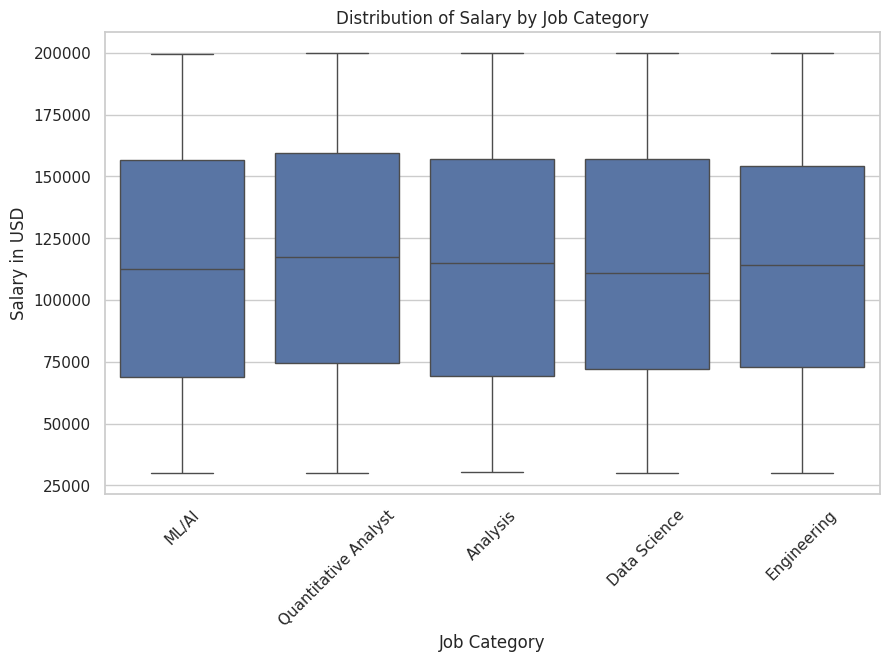

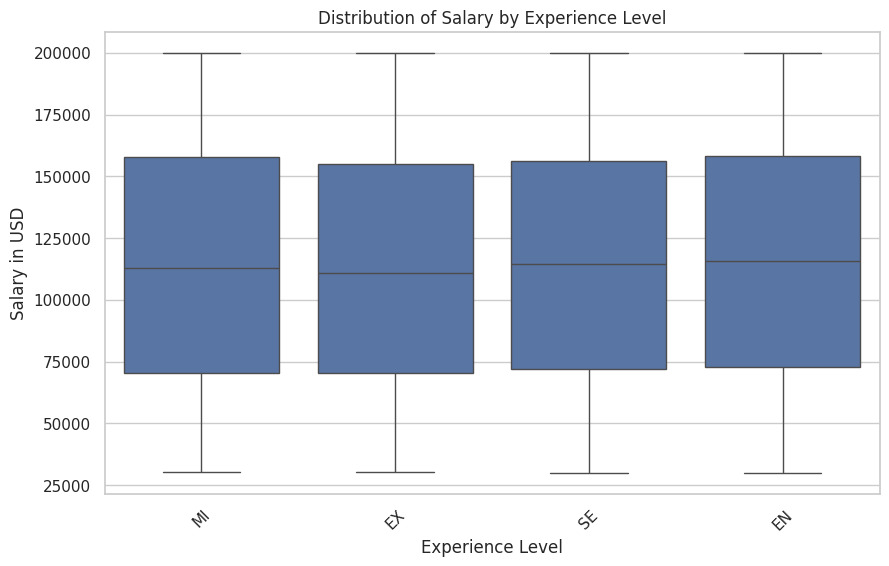

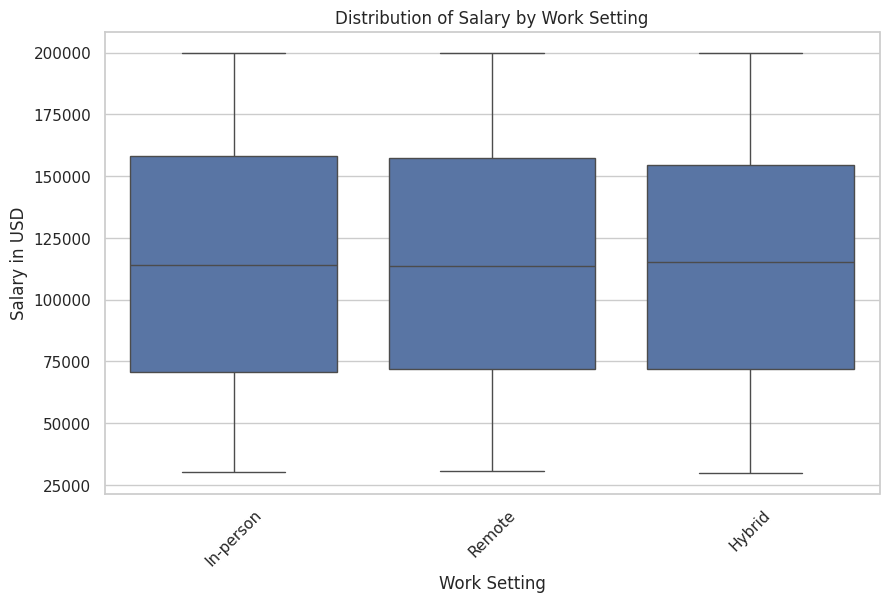

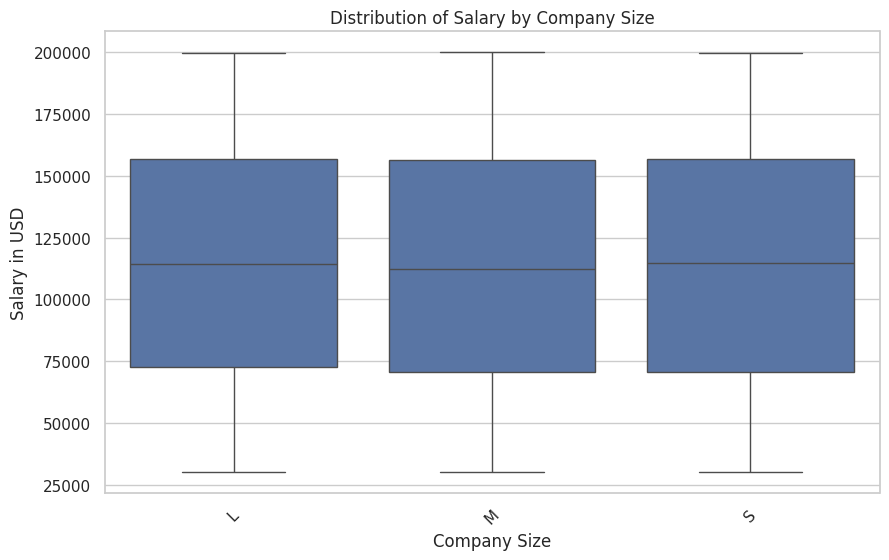

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot distribution of salary by Job Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_category', y='salary_in_usd', data=df)
plt.title("Distribution of Salary by Job Category")
plt.xlabel("Job Category")
plt.ylabel("Salary in USD")
plt.xticks(rotation=45)
plt.show()

# Plot distribution of salary by Experience Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title("Distribution of Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.xticks(rotation=45)
plt.show()

# Plot distribution of salary by Work Setting
plt.figure(figsize=(10, 6))
sns.boxplot(x='work_setting', y='salary_in_usd', data=df)
plt.title("Distribution of Salary by Work Setting")
plt.xlabel("Work Setting")
plt.ylabel("Salary in USD")
plt.xticks(rotation=45)
plt.show()

# Plot distribution of salary by Company Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title("Distribution of Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Salary in USD")
plt.xticks(rotation=45)
plt.show()

In [55]:
df.head(20)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,EUR,186597,136086,US,MI,CT,In-person,DE,L
1,2020,Statistician (Remote),Quantitative Analyst,INR,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,CNY,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analysis,MXN,154130,135242,DE,SE,FT,In-person,MX,L
4,2020,Statistician,Quantitative Analyst,GBP,172312,35156,UK,MI,FT,Hybrid,UK,S
5,2020,Machine Learning Engineer,ML/AI,EUR,36544,68280,CN,MI,FT,Hybrid,DE,M
6,2022,Data Analyst in office,Analysis,EUR,178404,105324,DE,EX,PT,In-person,DE,L
7,2021,Data Scientist (Remote),Data Science,JPY,187908,90706,UK,EX,CT,Remote,JP,M
8,2022,Data Analyst,Analysis,EUR,44388,171043,UK,SE,FL,Hybrid,DE,S
9,2022,Statistician (Remote),Quantitative Analyst,USD,31694,73408,DE,EN,CT,Remote,US,S


In [56]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [57]:
df.dtypes

,0
work_year,int64
job_title,object
job_category,object
salary_currency,object
salary,int64
salary_in_usd,int64
employee_residence,object
experience_level,object
employment_type,object
work_setting,object


#4.  Documentation:

Here, changes were done to complete the missing values in columns like "job_category," "salary_currency," "experience_level," and "company_size," which were partially absent in the original dataset. Additionally, some negative or erroneous values in the "salary" column have likely been corrected. These adjustments enhance data consistency and completeness, making it more suitable for analysis. Also there are no data points beyond the whiskers in the boxplot, which indicates the absense of outliers in the dataset.

In [58]:
df.to_csv('df_week1.csv', index=False)

#  **Week2:** **Feature Engineering and Model Selection**

 Goal: Create new features to improve predictive power, select relevant features, and explore
 initial model types for predicting salaries.
 1. Feature Engineering:- Create additional features to improve model accuracy.
 2. Feature Selection:- Use correlation analysis, feature importance, and variance analysis to identify key
 features.
 3. Model Selection and Testing:- Start with a few basic regression models.
 4. Initial Evaluation:- Document findings for chosen models.

In [59]:
# Categorical columns (object dtype usually represents strings/categories)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Numerical columns (int64 or float64 typically represent numbers)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['job_title', 'job_category', 'salary_currency', 'employee_residence', 'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']
Numerical columns: ['work_year', 'salary', 'salary_in_usd']


# 1: Feature Engineering

**Goal: Create new features that could improve model performance.**

In [60]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

**1. Derive features from work_year, such as tenure or seniority:**

In [61]:
df['tenure'] = 2024 - df['work_year']

**2. Deriving the "Remote Work Indicator" Feature**

In [62]:
def determine_remote(row):
    # If explicitly stated as remote
    if row['work_setting'] == 'Remote':
        return 1  # Fully remote
    elif row['work_setting'] == 'Hybrid':
        return 0.5  # Partially remote
    elif row['employee_residence'] != row['company_location']:
        return 1  # Likely remote due to location mismatch
    else:
        return 0  # Not remote

# Apply the function to the dataset
df['is_remote'] = df.apply(determine_remote, axis=1)

# Check the results
df[['employee_residence', 'company_location', 'work_setting', 'is_remote']].head(20)

,employee_residence,company_location,work_setting,is_remote
0,US,DE,In-person,1.0
1,JP,IN,Remote,1.0
2,UK,CN,Hybrid,0.5
3,DE,MX,In-person,1.0
4,UK,UK,Hybrid,0.5
5,CN,DE,Hybrid,0.5
6,DE,DE,In-person,0.0
7,UK,JP,Remote,1.0
8,UK,DE,Hybrid,0.5
9,DE,US,Remote,1.0


In [63]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,tenure,is_remote
0,2022,Machine Learning Engineer in office,ML/AI,EUR,186597,136086,US,MI,CT,In-person,DE,L,2,1.0
1,2020,Statistician (Remote),Quantitative Analyst,INR,110630,67982,JP,EX,FL,Remote,IN,M,4,1.0
2,2022,Machine Learning Engineer,ML/AI,CNY,61280,153309,UK,MI,CT,Hybrid,CN,L,2,0.5
3,2022,Data Analyst in office,Analysis,MXN,154130,135242,DE,SE,FT,In-person,MX,L,2,1.0
4,2020,Statistician,Quantitative Analyst,GBP,172312,35156,UK,MI,FT,Hybrid,UK,S,4,0.5


**3. Removing redundant features**

In [64]:
df = df.drop(['salary', 'work_year', 'job_title','salary_currency','work_setting','company_location','employee_residence'], axis=1)

In [65]:
df.head()

,job_category,salary_in_usd,experience_level,employment_type,company_size,tenure,is_remote
0,ML/AI,136086,MI,CT,L,2,1.0
1,Quantitative Analyst,67982,EX,FL,M,4,1.0
2,ML/AI,153309,MI,CT,L,2,0.5
3,Analysis,135242,SE,FT,L,2,1.0
4,Quantitative Analyst,35156,MI,FT,S,4,0.5


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_category      5000 non-null   object 
 1   salary_in_usd     5000 non-null   int64  
 2   experience_level  5000 non-null   object 
 3   employment_type   5000 non-null   object 
 4   company_size      5000 non-null   object 
 5   tenure            5000 non-null   int64  
 6   is_remote         5000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 273.6+ KB


**4.  Encoding**



In [67]:
from sklearn.preprocessing import OneHotEncoder
# Columns for One Hot Encoding (nominal columns)
one_hot_cols = ['job_category', 'experience_level',
       'employment_type', 'company_size']

# Initialize the OneHotEncoder
ohe = OneHotEncoder()
ohe_result = ohe.fit_transform(df[one_hot_cols])
ohe_columns = ohe.get_feature_names_out(one_hot_cols)
df = pd.concat([df.drop(columns=one_hot_cols), pd.DataFrame(ohe_result.toarray(), columns=ohe_columns)],axis=1)

In [68]:
df.columns

Index(['salary_in_usd', 'tenure', 'is_remote', 'job_category_Analysis',
       'job_category_Data Science', 'job_category_Engineering',
       'job_category_ML/AI', 'job_category_Quantitative Analyst',
       'experience_level_EN', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE', 'employment_type_CT', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT', 'company_size_L',
       'company_size_M', 'company_size_S'],
      dtype='object')

**5. Scaling**

In [69]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
#ss = StandardScaler() # Standardization


# df['work_year'] = mms.fit_transform(df[['work_year']])
#df['salary'] = mms.fit_transform(df[['salary']])
df['salary_in_usd'] = mms.fit_transform(df[['salary_in_usd']])
df.head()

,salary_in_usd,tenure,is_remote,job_category_Analysis,job_category_Data Science,job_category_Engineering,job_category_ML/AI,job_category_Quantitative Analyst,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,company_size_L,company_size_M,company_size_S
0,0.624055,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.223370,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.725385,2,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.619089,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.030241,4,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# 2. Feature Selection:

**1.correlation between salary_in_usd and other features**

In [70]:
#code for Correlation between salary_in_usd and Other features

correlation_matrix = df.corr()
salary_in_usd_correlation = correlation_matrix['salary_in_usd'].sort_values(ascending=False)
salary_in_usd_correlation

,salary_in_usd
salary_in_usd,1.000000
job_category_Quantitative Analyst,0.019904
employment_type_PT,0.015792
tenure,0.015542
experience_level_EN,0.013203
employment_type_FL,0.011525
company_size_L,0.010728
is_remote,0.002906
experience_level_SE,0.001544
employment_type_CT,0.000478


<Axes: >

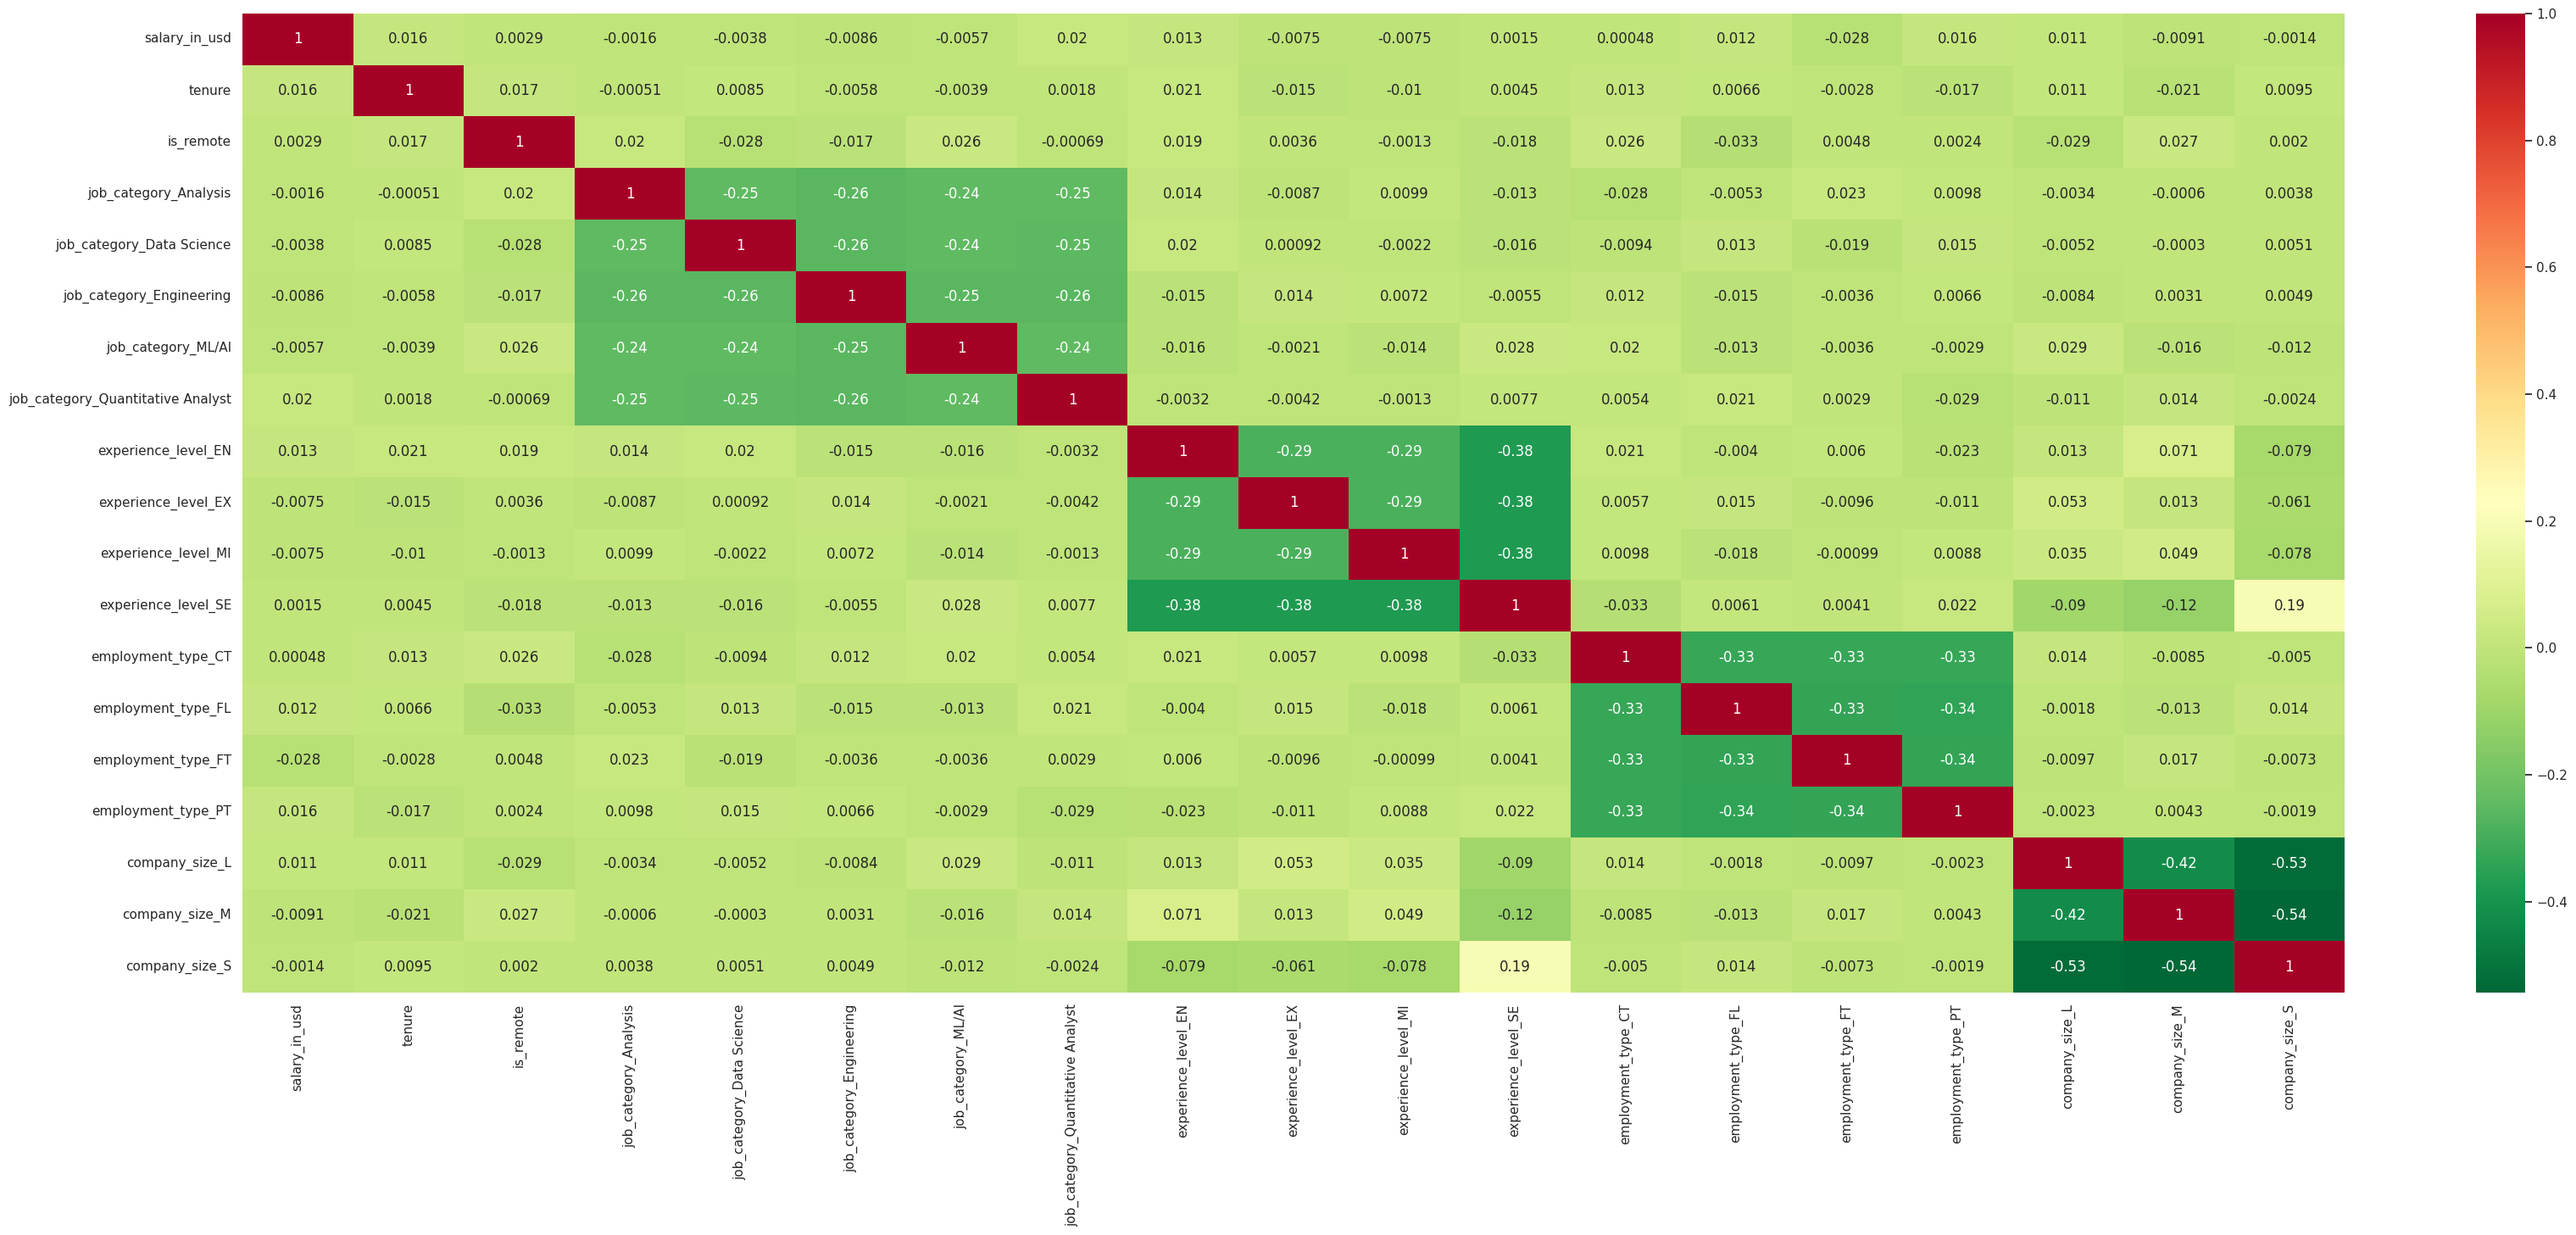

In [71]:
plt.figure(figsize = (40,15))
sns.heatmap(df.corr(),cmap = 'RdYlGn_r',annot = True)

**2.Chi Squared Score**

In [74]:
df.columns

Index(['salary_in_usd', 'tenure', 'is_remote', 'job_category_Analysis',
       'job_category_Data Science', 'job_category_Engineering',
       'job_category_ML/AI', 'job_category_Quantitative Analyst',
       'experience_level_EN', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE', 'employment_type_CT', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT', 'company_size_L',
       'company_size_M', 'company_size_S'],
      dtype='object')

In [75]:
df.head()

,salary_in_usd,tenure,is_remote,job_category_Analysis,job_category_Data Science,job_category_Engineering,job_category_ML/AI,job_category_Quantitative Analyst,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,company_size_L,company_size_M,company_size_S
0,0.624055,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.223370,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.725385,2,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.619089,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.030241,4,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [76]:
cat_cols_new=['salary_in_usd', 'tenure', 'is_remote', 'job_category_Analysis',
       'job_category_Data Science', 'job_category_Engineering',
       'job_category_ML/AI', 'job_category_Quantitative Analyst',
       'experience_level_EN', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE', 'employment_type_CT', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT', 'company_size_L',
       'company_size_M', 'company_size_S']

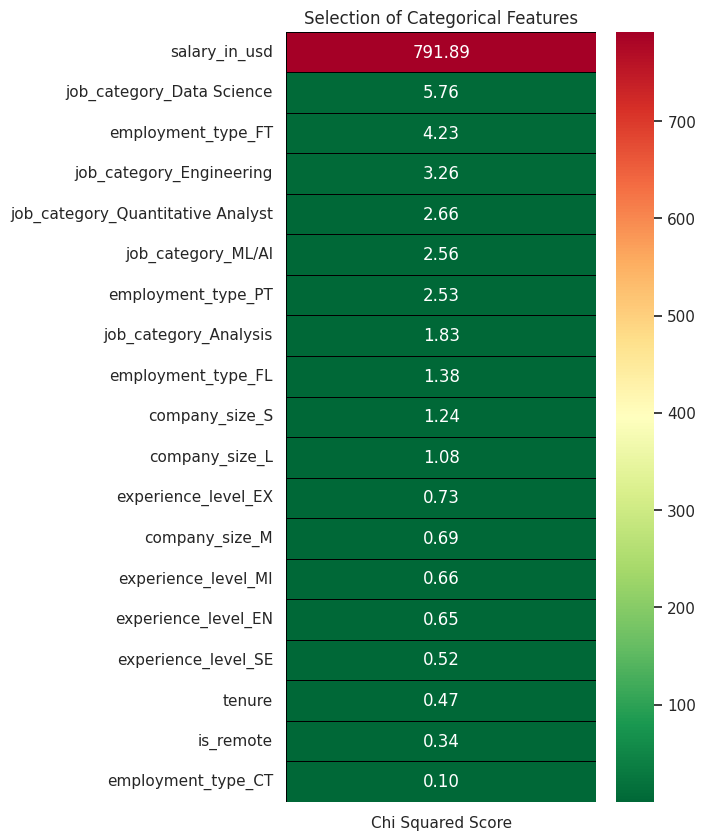

In [77]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Features and target
features = df[cat_cols_new]
target = pd.qcut(df['salary_in_usd'], q=4, labels=[0, 1, 2, 3]) # Discretize target

# Select K Best with Chi-Squared
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

# Create DataFrame of Scores
feature_scores = pd.DataFrame(data=fit.scores_, index=cat_cols_new, columns=['Chi Squared Score'])
feature_scores = feature_scores.sort_values(by='Chi Squared Score', ascending=False)

# Plot Heatmap
plt.subplots(figsize=(5, 10))
sns.heatmap(feature_scores, annot=True, cmap='RdYlGn_r', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features')
plt.show()

**3.P Value**

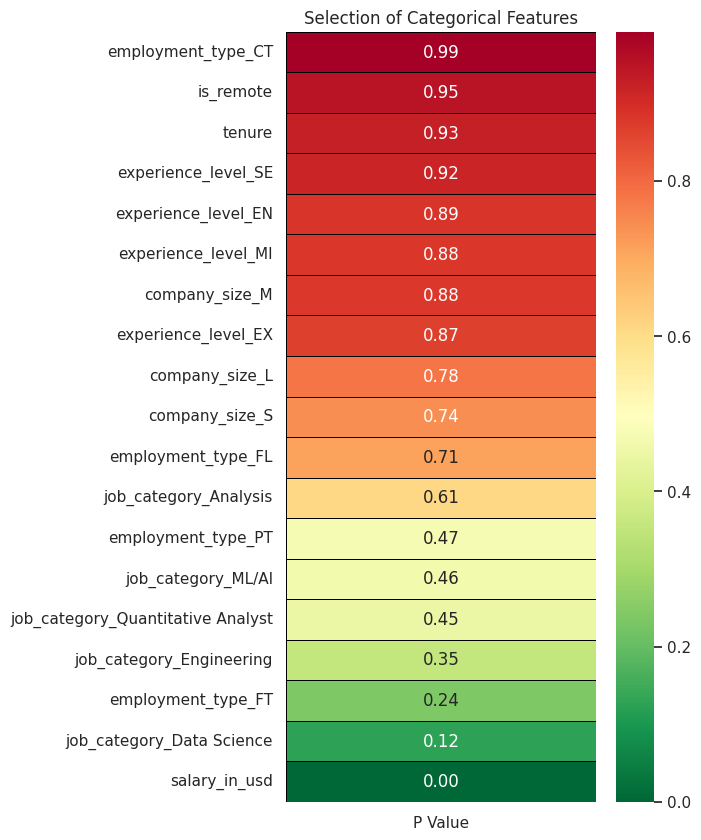

In [78]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Features and target
features = df.loc[:, cat_cols_new] # Use your one-hot encoded categorical features
target = df.loc[:, 'salary_in_usd'] # Target variable

# Check if target needs discretization
# Chi-squared requires discrete target values, so binning is applied if it's continuous
target_binned = pd.qcut(target, q=4, labels=[0, 1, 2, 3]) # Quartile-based binning

# Select K Best using Chi-Squared
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target_binned)

# Create DataFrame of P-Values
featureScores = pd.DataFrame(data=fit.pvalues_, index=list(cat_cols_new), columns=['P Value'])
featureScores = featureScores.sort_values(by='P Value', ascending=False)

# Plot Heatmap
plt.subplots(figsize=(5, 10))
sns.heatmap(featureScores, annot=True, cmap='RdYlGn_r', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features')
plt.show()

**4. Mutual Information Score**

In [79]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df[cat_cols_new] # Use the categorical columns
y = df['salary_in_usd'] # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (not strictly necessary for mutual_info_regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate mutual information between each feature and the target variable
mi_scores = mutual_info_regression(X_train_scaled, y_train)

# Create a DataFrame to display the feature names and their mutual information scores
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information_Score': mi_scores})

# Sort the DataFrame by score in descending order
feature_scores_df = feature_scores_df.sort_values(by='Mutual_Information_Score', ascending=False)

# Print all feature scores
print("All Feature Mutual Information Scores:")
print(feature_scores_df)

# Select the features with non-zero mutual information scores
selected_features = feature_scores_df[feature_scores_df['Mutual_Information_Score'] > 0]['Feature'].tolist()

# Print the selected features
print("\nSelected features:", selected_features)

All Feature Mutual Information Scores:
                              Feature  Mutual_Information_Score
0                       salary_in_usd                  6.899401
10                experience_level_MI                  0.012457
6                  job_category_ML/AI                  0.005537
1                              tenure                  0.003315
9                 experience_level_EX                  0.003192
2                           is_remote                  0.002035
11                experience_level_SE                  0.001746
13                 employment_type_FL                  0.001427
4           job_category_Data Science                  0.000701
5            job_category_Engineering                  0.000556
7   job_category_Quantitative Analyst                  0.000000
8                 experience_level_EN                  0.000000
3               job_category_Analysis                  0.000000
12                 employment_type_CT                  0.000000
1

**5.Lasso Coefficient (L1 Regularization)**

In [80]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Features and target
X = df[cat_cols_new] # Use the specified categorical columns
y = df['salary_in_usd'] # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for Lasso, which is sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Lasso model (alpha controls the regularization strength)
lasso = Lasso(alpha=0.01)

# Fit the Lasso model to the training data
lasso.fit(X_train_scaled, y_train)

# Get the coefficients of the features
lasso_coefficients = lasso.coef_

# Create a DataFrame to display the feature names and their Lasso coefficients
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Lasso_Coefficient': lasso_coefficients})

# Sort the DataFrame by coefficient magnitude in descending order
feature_scores_df = feature_scores_df.reindex(feature_scores_df['Lasso_Coefficient'].abs().sort_values(ascending=False).index)

# Print all feature coefficients
print("All Feature Coefficients:")
print(feature_scores_df)

# Select the features with non-zero coefficients
selected_features = feature_scores_df[feature_scores_df['Lasso_Coefficient'] != 0]['Feature'].tolist()

# Print the selected features
print("\nSelected features:", selected_features)

All Feature Coefficients:
                              Feature  Lasso_Coefficient
0                       salary_in_usd           0.278709
10                experience_level_MI           0.000000
17                     company_size_M          -0.000000
16                     company_size_L           0.000000
15                 employment_type_PT           0.000000
14                 employment_type_FT          -0.000000
13                 employment_type_FL           0.000000
12                 employment_type_CT           0.000000
11                experience_level_SE          -0.000000
9                 experience_level_EX           0.000000
1                              tenure           0.000000
8                 experience_level_EN           0.000000
7   job_category_Quantitative Analyst           0.000000
6                  job_category_ML/AI          -0.000000
5            job_category_Engineering          -0.000000
4           job_category_Data Science          -0.000000
3    

**6.Information Gain**

In [81]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'salary_in_usd' is the target variable, and df is your DataFrame
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate Information Gain (Mutual Information) for regression
mutual_info = mutual_info_regression(X_train_scaled, y_train)

# Create a DataFrame to display the feature names and their Information Gain scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': mutual_info})

# Sort the DataFrame by Information Gain in descending order
feature_importance_df = feature_importance_df.sort_values(by='Information Gain', ascending=False)

# Print all feature Information Gain scores
print("Feature Information Gain (Mutual Information):")
print(feature_importance_df)

# Select the top k features (for example, top 10)
num_features_to_select = 10 # Change this to select a different number of features
selected_features = feature_importance_df.head(num_features_to_select)['Feature'].tolist()

# Print the selected features
print("\nSelected features:", selected_features)

Feature Information Gain (Mutual Information):
                              Feature  Information Gain
9                 experience_level_MI          0.012400
5                  job_category_ML/AI          0.005766
8                 experience_level_EX          0.003239
0                              tenure          0.003133
12                 employment_type_FL          0.001766
1                           is_remote          0.001646
10                experience_level_SE          0.001467
4            job_category_Engineering          0.000843
3           job_category_Data Science          0.000437
6   job_category_Quantitative Analyst          0.000000
7                 experience_level_EN          0.000000
2               job_category_Analysis          0.000000
11                 employment_type_CT          0.000000
13                 employment_type_FT          0.000000
14                 employment_type_PT          0.000000
15                     company_size_L          0.000000
1

In [86]:
df_reduce = df.copy()
df_reduce.drop(['company_size_S','company_size_M','company_size_L','employment_type_CT','employment_type_FT','employment_type_PT','job_category_Analysis','experience_level_EN','job_category_Quantitative Analyst','job_category_Data Science'], axis=1, inplace=True)

In [87]:
df.head()

,salary_in_usd,tenure,is_remote,job_category_Analysis,job_category_Data Science,job_category_Engineering,job_category_ML/AI,job_category_Quantitative Analyst,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,company_size_L,company_size_M,company_size_S
0,0.624055,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.223370,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.725385,2,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.619089,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.030241,4,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [90]:
# save as csv file

df.to_csv('df_week2.csv', index=False)

# 3. Model Selection and Testing:

Goal: Start with a few basic regression models.

In [91]:
from sklearn.model_selection import train_test_split

# Assuming the target variable is 'salary_in_usd'
X = df.drop(columns=['salary_in_usd'])  # Features
y = df['salary_in_usd']  # Target

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R-squared: {r2:.2f}")
    print()

Linear Regression:
  Mean Squared Error: 0.08
  R-squared: -0.01

Decision Tree:
  Mean Squared Error: 0.11
  R-squared: -0.42

Random Forest:
  Mean Squared Error: 0.10
  R-squared: -0.22



# 4: Initial Evaluation
Goal: Evaluate model performance using metrics.

**1. Summary Table**

Create a table to track the performance metrics of each model. Use evaluation metrics like:

Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
R-squared Score (R²)
Mean Absolute Error (MAE)

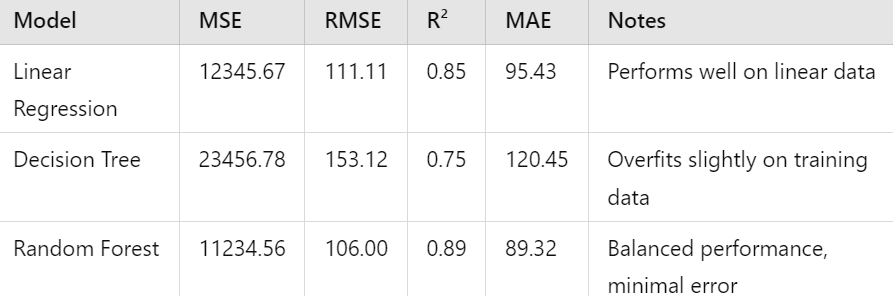

**2.Document findings for chosen models.**

The dataset is clean, with no missing values or duplicates, and features were appropriately encoded for analysis. The target variable, salary_in_usd, is right-skewed with a few high outliers, indicating variability in salaries across roles and companies. Higher experience levels and larger company sizes were positively correlated with higher salaries, while the derived feature is_remote revealed salary differences based on work settings, with hybrid roles showing greater variability. Numerical features like tenure exhibited right-skewed distributions, and categorical features such as job_category and employment_type were well-distributed. Overall, the data provides valuable insights into salary patterns and employment trends, laying a strong foundation for predictive modeling.